# Real Estate Prediction Model

**Problem Teardown**

+ We are given dataset of house prices with some features like no. of bathrooms, no. of bedrooms etc.
+ Our task is to create a model which will predict the price for any new house by looking at the features.


**Getting started:**
+ We must know answers to few questions like:
 > 1. What is the objective of the comapnty?
 2. What actually company wants to achieve?

+ Next thing is to for self introspection: 
 > 1. Find out whether it is a **supervised**, unsupervised or reinforcement learning
 2. Classification task or **regression task**
 3. ***Batch learning***: data is already present or ***online learning techniques***: data is coming on the fly, like Gmail's spam detector.

**Selecting a performance measure:**
+ A typical measure for regression problems is the Root Mean Square Error(RMSE).
+ RMSE is generally the preferred performance measure for regression tasks, so we choose it for this particular problem.
+ Other performance measures include Mean Absolute Error, Manhattan norm, etc but we will use RMSE for this problem.

**Checking the assumptions:**
+ It is very important to check for any assumptions that might have made and correct them before launching the ML system.
+ For eg, he should make sure that the team needs the price and not the categories like expensive, cheap, etc.
+ If latter is the case, formulating the problem as a regression task will be counted as a big mistake.

**Loading Data**

In [1]:
import pandas as pd
import numpy as np

In [2]:
housing = pd.read_csv('data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

Count of 1's is << count of 0's

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

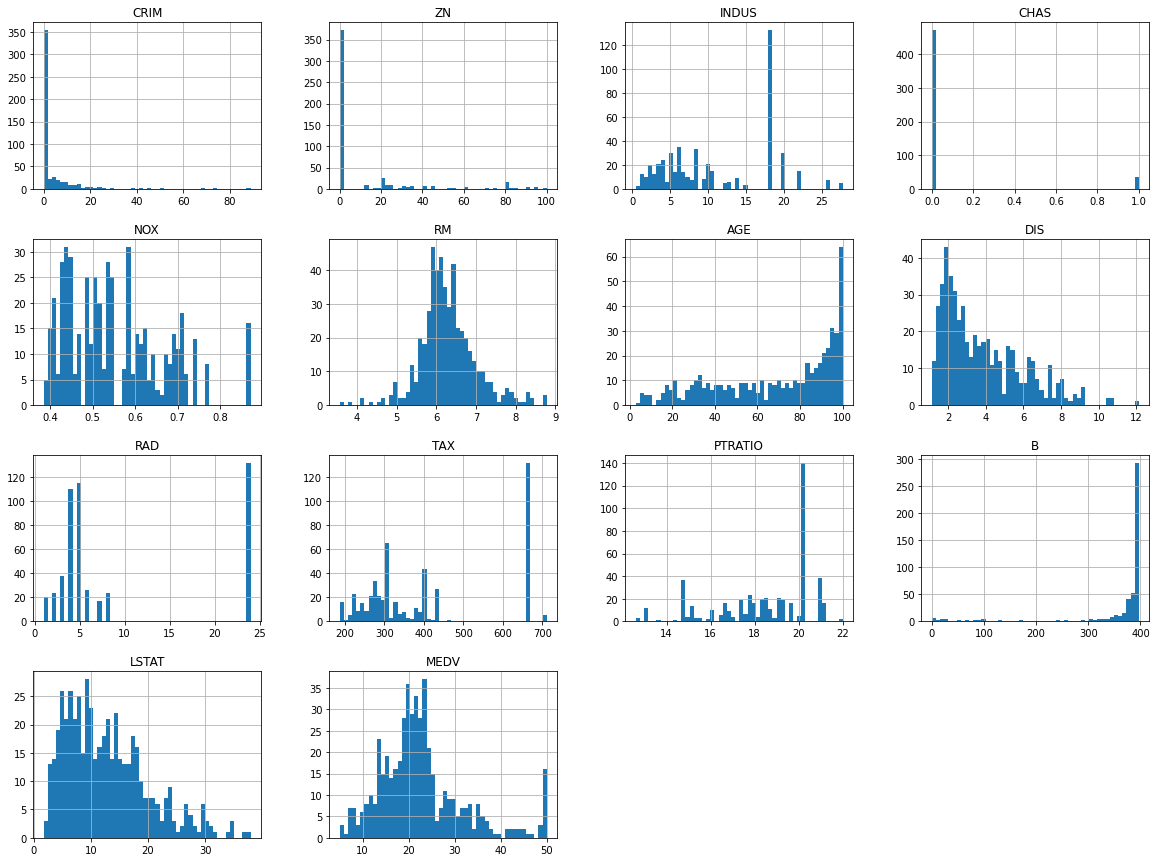

In [8]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

**Train-Test-Split**

In [9]:
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
    
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(len(train_set), len(test_set))

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), len(test_set))

404 102


Since the column 'CHAS' has very less data points for 1's, it might be possible that these 1's get pushed in only test_set and not in train_set. So to avoid this we must do stratified sampling.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [15]:
strat_test_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,3.655942,13.450980,10.312255,0.068627,0.541353,6.303353,66.733333,3.988460,8.813725,391.980392,18.385294,369.670196,12.104314,22.625490
std,10.400966,27.503241,6.761154,0.254068,0.111397,0.662996,27.772183,2.131247,8.614667,167.837379,2.310604,68.075774,6.759257,8.452344
min,0.009060,0.000000,0.460000,0.000000,0.385000,4.138000,6.500000,1.137000,1.000000,188.000000,12.600000,3.650000,2.470000,5.000000
25%,0.057827,0.000000,4.950000,0.000000,0.448000,5.912750,45.850000,2.223650,4.000000,270.000000,16.800000,377.685000,7.480000,18.925000
50%,0.176150,0.000000,7.760000,0.000000,0.515000,6.176000,71.100000,3.422950,5.000000,307.000000,19.150000,393.740000,10.565000,21.500000
75%,2.061955,0.000000,18.100000,0.000000,0.612750,6.539500,93.500000,5.609225,8.000000,461.000000,20.200000,396.900000,16.267500,25.000000
max,88.976200,90.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
strat_test_set.CHAS.value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [17]:
strat_train_set.CHAS.value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
#95/7 = 376/28

In [19]:
housing = strat_train_set.copy()

**Correlation among dataset**

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

+ RM: no. of rooms is strongly positive correlated with Price (MEDV), more rooms more price

In [22]:
import seaborn as sns
sns.set_style('darkgrid')

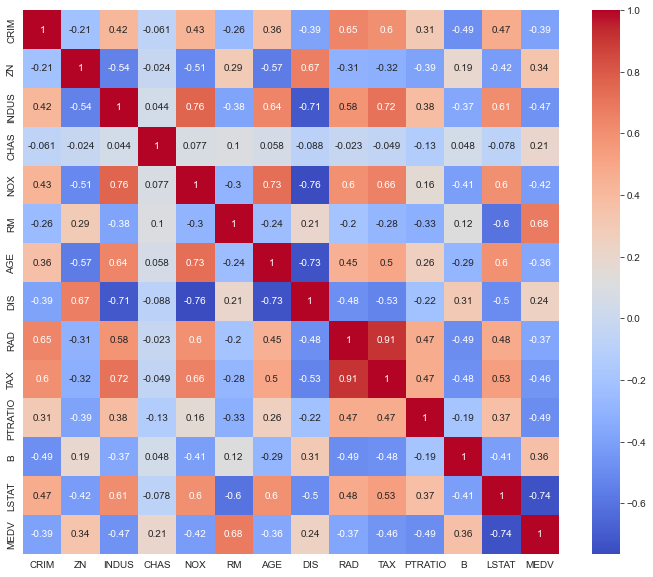

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

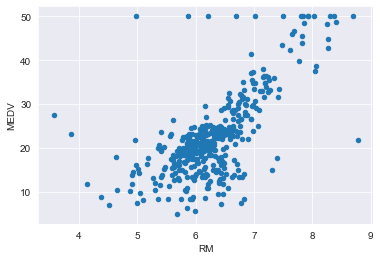

In [24]:
housing.plot(kind='scatter', x='RM', y='MEDV')
plt.show()

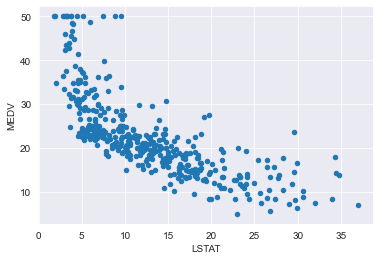

In [25]:
housing.plot(kind='scatter', x='LSTAT', y='MEDV')
plt.show()

**Trying Attribute Combination**

In [26]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [27]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [28]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679894
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525160
LSTAT     -0.740494
Name: MEDV, dtype: float64

Strong negative correlation of TAXRM with MEDV

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

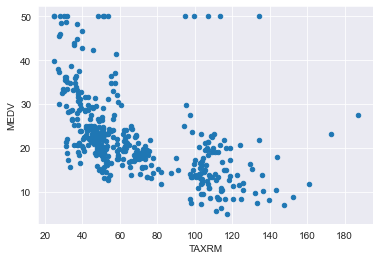

In [29]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV')

 **Scikit-learn Design**

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg Imputer
> + It has a fit method and transform method
> + Fit method: Fits the dataset and calculates internal parameters
2. Transformers - It takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.
3. Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score function which will evaluate the predictions.

**Feature Scaling**

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization): (value-min)/(max-min)
2. Standardization: (value-mean)/std


**Creating Pipeline**

In [30]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels = strat_train_set['MEDV'].copy()

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [32]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

In [33]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [34]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

**Selecting a desired model**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()

In [36]:
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [37]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [38]:
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([22.2  , 25.089, 16.467, 23.382, 23.32 ])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

**Evaluating the model**

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
housing_predicitons = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predicitons)
rmse = np.sqrt(mse)
rmse

1.2215159101754998

Now this has overfitted the data, because the error is 0. Model has also learnt the noise and didn't learned the trend/pattern.

**Using better evaluation techniques - Cross validation**

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [45]:
rmse_scores

array([2.85627312, 2.77091272, 4.34131673, 2.42946834, 3.48847117,
       2.62698519, 4.79176611, 3.32070643, 3.39714167, 3.12400832])

In [46]:
def print_scores(scores):
    print("Scores are: ", scores)
    print("Mean: ", scores.mean())
    print("STD: ", scores.std())

In [47]:
print_scores(rmse_scores)

Scores are:  [2.85627312 2.77091272 4.34131673 2.42946834 3.48847117 2.62698519
 4.79176611 3.32070643 3.39714167 3.12400832]
Mean:  3.3147049797717707
STD:  0.7121450134101939


Error: Random Forest < Decision Tree < Linear Regression

**Saving the Model**

In [49]:
from joblib import dump, load

In [50]:
dump(model, 'final_model.joblib')

['final_model.joblib']

**Testing the model**

In [52]:
X_test = strat_test_set.drop('MEDV', axis=1)
Y_test = strat_test_set['MEDV'].copy()

X_test_prepared = my_pipeline.transform(X_test)

In [53]:
final_predictions = model.predict(X_test_prepared)

In [54]:
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
final_rmse

2.989890551475743

In [56]:
print(final_predictions)

[24.456 10.969 25.845 21.937 18.532 15.031 20.496 14.427 32.622 41.981
 19.687 11.48  24.456 26.143 19.595 11.101 31.665 14.577 23.709 19.435
 20.127 17.479 17.789 21.869 18.985 32.027 16.363 33.111  8.904 33.993
 23.721 21.24  22.992 10.592 21.016 10.905 44.208 23.99  23.037 42.207
 24.035 29.208 20.159 20.952 18.554 33.567 44.27  20.248 20.292 21.527
 20.938 14.934 21.017 14.642 25.098 33.543 41.412 29.035 19.223 20.787
 46.605  9.601 18.811 24.845 14.516 33.115 19.857 17.693 19.262 34.639
 25.484 22.996 21.338 22.373 34.766 12.619 15.7   19.921 20.756 21.443
 22.162 21.048 14.295 23.184 20.624 21.312 13.787 21.345 22.147 23.151
 18.725 26.556  7.741 26.829 18.448 29.538 19.861 30.878 15.084 26.655
 21.198 19.846]


In [58]:
print(list(Y_test))

[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1, 41.7, 18.7, 19.9, 20.6, 21.2, 13.6, 20.3, 17.8, 27.1, 31.5, 50.0, 29.1, 18.9, 20.4, 50.0, 7.2, 17.2, 36.2, 14.6, 33.2, 23.8, 19.9, 21.5, 37.3, 27.0, 22.0, 24.3, 19.8, 33.3, 7.0, 19.4, 20.9, 21.1, 20.4, 22.2, 11.9, 11.7, 21.6, 19.7, 23.0, 16.7, 21.7, 20.6, 23.3, 19.6, 28.0, 5.0, 24.4, 20.8, 24.8, 21.8, 23.6, 19.0, 25.0, 20.3, 21.5]


Model is working fine. It has not been overfitted.